In [3]:
#Importing libraries
#Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Load all the data
cs_df = pd.read_csv('customer_segmentation.csv')

In [5]:
# Exploratory Data Analysis (EDA)
#we will now look for the context our data is in (retreive info about our variables)

In [6]:
cs_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.9,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.7,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.9,22.75,belo horizonte,SP,perfumaria,29,178,perfumery


In [7]:
cs_df.corr()

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
payment_installments,1.000000,0.309472,0.071594,0.295054,0.205758,-0.006959,0.032461
payment_value,0.309472,1.000000,0.230238,0.763896,0.382981,-0.003285,0.165994
order_item_id,0.071594,0.230238,1.000000,-0.069742,-0.049857,-0.018701,-0.027602
price,0.295054,0.763896,-0.069742,1.000000,0.415021,0.016533,0.188408
freight_value,0.205758,0.382981,-0.049857,0.415021,1.000000,0.048363,0.121719
product_name_lenght,-0.006959,-0.003285,-0.018701,0.016533,0.048363,1.000000,0.112177
product_description_lenght,0.032461,0.165994,-0.027602,0.188408,0.121719,0.112177,1.000000


In [8]:
#Now we look for info about the data
print("Dataset info:")
display(cs_df.info())
print()
print("Dataset shape:")
display(cs_df.shape)
print()
display(cs_df.describe())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13801 entries, 0 to 13800
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       13801 non-null  object 
 1   customer_id                    13801 non-null  object 
 2   order_status                   13801 non-null  object 
 3   order_purchase_timestamp       13801 non-null  object 
 4   order_approved_at              13801 non-null  object 
 5   order_delivered_carrier_date   13801 non-null  object 
 6   order_delivered_customer_date  13801 non-null  object 
 7   order_estimated_delivery_date  13801 non-null  object 
 8   payment_type                   13801 non-null  object 
 9   payment_installments           13801 non-null  int64  
 10  payment_value                  13801 non-null  float64
 11  customer_unique_id             13801 non-null  object 
 12  customer_city                  1

None


Dataset shape:


(13801, 26)

,payment_installments,payment_value,order_item_id,price,freight_value,product_name_lenght,product_description_lenght
count,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000,13801.000000
mean,3.014637,194.349691,1.230491,130.947103,21.938168,49.300703,814.330411
std,2.801721,294.854258,0.737495,210.712421,18.567013,9.759529,648.790194
min,1.000000,0.050000,1.000000,0.850000,0.000000,8.000000,4.000000
25%,1.000000,66.750000,1.000000,40.000000,12.870000,43.000000,366.000000
50%,2.000000,120.290000,1.000000,79.000000,18.230000,52.000000,631.000000
75%,4.000000,206.780000,1.000000,139.000000,23.310000,57.000000,1030.000000
max,20.000000,7274.880000,13.000000,4590.000000,375.280000,69.000000,3985.000000


In [9]:
#Find what percentage of data is empty in each column
round((cs_df.isnull().sum()/ len(cs_df)*100),2)
#We can see there are no empty columns (hence there are no missing values)

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
seller_city                      0.0
seller_state                     0.0
product_category_name            0.0
product_name_lenght              0.0
product_description_lenght       0.0
product_category_name_english    0.0
dtype: float64

<AxesSubplot:>

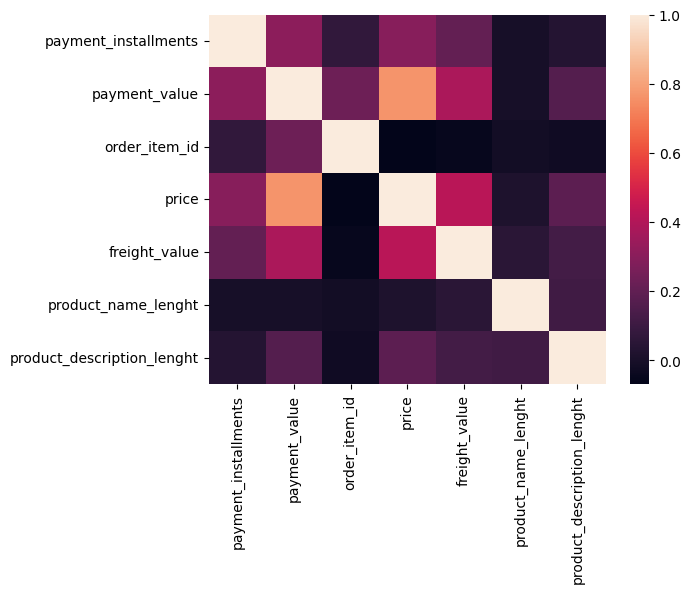

In [10]:
#heatmap of the correlation 
sns.heatmap(cs_df.corr())

delivered     13497
shipped         153
canceled         86
invoiced         54
processing       11
Name: order_status, dtype: int64

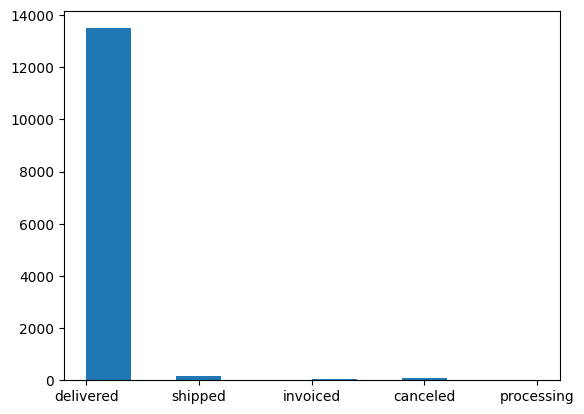

credit_card    10330
boleto          2520
voucher          582
debit_card       369
Name: payment_type, dtype: int64

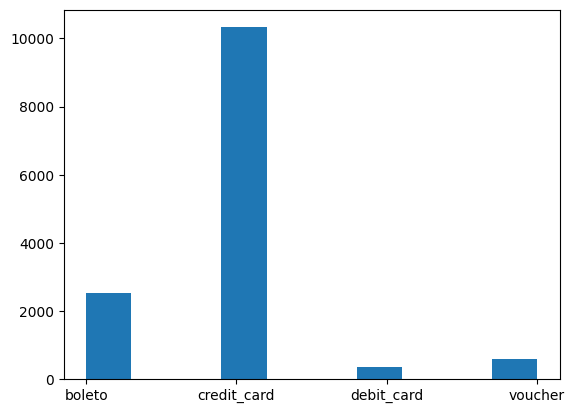

In [11]:
#We display a few of the variables with an outcome that is not confusing
display(pd.value_counts(cs_df['order_status']))
_ = plt.hist(cs_df['order_status']) 
plt.show()

display(pd.value_counts(cs_df['payment_type']))
_ = plt.hist(cs_df['payment_type']) 
plt.show()

In [12]:
#Check for duplicates
print('Data duplicates: ',cs_df.duplicated().sum())

Data duplicates:  83


In [16]:
#Get rid of the duplicates
cs_df.drop_duplicates()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type,payment_installments,...,seller_id,shipping_limit_date,price,freight_value,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_category_name_english
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,belo horizonte,SP,perfumaria,29,178,perfumery
1,86674ccaee19790309333210917b2c7d,1b338293f35549b5e480b9a3d7bbf3cd,delivered,2018-08-09 11:37:35,2018-08-09 14:35:19,2018-08-10 14:34:00,2018-08-14 18:51:47,2018-08-22 00:00:00,credit_card,5,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-13 14:31:29,116.90,18.92,belo horizonte,SP,perfumaria,29,178,perfumery
2,aee682982e18eb4714ce9f97b15af5e2,8858442ea4d5dc5bb9e118e8f728095d,delivered,2018-07-09 18:46:28,2018-07-11 03:45:45,2018-07-11 15:01:00,2018-07-12 18:14:35,2018-07-18 00:00:00,boleto,1,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-13 03:45:45,118.70,9.34,belo horizonte,SP,perfumaria,29,178,perfumery
3,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.90,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
4,d543201a9b42a1402ff97e65b439a48b,971bf8f42a9f8cb3ead257854905b454,delivered,2018-08-21 10:00:25,2018-08-21 10:50:54,2018-08-22 15:21:00,2018-08-28 18:58:22,2018-09-10 00:00:00,credit_card,2,...,289cdb325fb7e7f891c38608bf9e0962,2018-08-23 10:50:54,116.90,22.75,belo horizonte,SP,perfumaria,29,178,perfumery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13796,493ba21a937e956c5e0e4e26c9f1b7f9,408d74d06be5d5140bb933f248de1342,delivered,2018-07-15 09:56:32,2018-07-16 13:30:36,2018-07-27 07:26:00,2018-08-02 18:06:41,2018-07-26 00:00:00,boleto,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-07-20 13:30:36,19.99,7.40,sao paulo,SP,livros_importados,53,80,books_imported
13797,4a7cf245701068d38d441791b735e4bd,1d3b24ba06f2e3fa4bfa74fd70d2310f,delivered,2018-05-07 20:36:47,2018-05-07 20:51:50,2018-05-08 15:04:00,2018-05-09 22:38:53,2018-05-17 00:00:00,credit_card,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-05-11 20:51:50,18.99,7.39,sao paulo,SP,livros_importados,53,80,books_imported
13798,33f8dfc5a51063c31d7b12e9d43a45fc,8f7f4871646eb2fa410cc2d50b861317,delivered,2018-04-28 14:32:54,2018-04-28 14:53:18,2018-05-02 15:25:00,2018-05-03 23:51:56,2018-05-14 00:00:00,credit_card,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-05-04 14:53:18,18.99,7.39,sao paulo,SP,livros_importados,53,80,books_imported
13799,442a41b00a8a8bda35511fdf1eb65cc5,e42e2e8642f9c09100b6667e321c2811,invoiced,2018-07-11 22:27:32,2018-07-11 22:45:43,2018-07-11 22:45:43,2018-07-20 00:00:00,2018-07-20 00:00:00,credit_card,1,...,7c5b05cbdb5542049f38d90d7815b97d,2018-07-16 22:45:43,44.99,7.58,sao paulo,SP,livros_importados,53,568,books_imported


In [17]:
#Check for duplicates again
print('Data duplicates: ',cs_df.duplicated().sum()) #we now know that cs_df is our dataframe but w/o duplicates

Data duplicates:  0


In [18]:
#Now we need to Change the data type in the date columns so that it matches the data type
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date'] 

for col in date_columns:
    cs_df[col] = pd.to_datetime(cs_df[col], format='%Y-%m-%d %H:%M:%S')

In [20]:
#create a column month_order for data exploration
cs_df['Month_order'] = cs_df['order_purchase_timestamp'].dt.to_period('M').astype('str')
print(cs_df['Month_order'])

0        2018-07
1        2018-08
2        2018-07
3        2018-08
4        2018-08
          ...   
13796    2018-07
13797    2018-05
13798    2018-04
13799    2018-07
13800    2018-08
Name: Month_order, Length: 13718, dtype: object


In [ ]:
#since the data is already very clean we can start building our model right away